Assignment 3

In [6]:
import numpy as np
import cv2
import random
import matplotlib as plt
import matplotlib.pyplot as plt

In this exercise, we will estimate the fundamental matrix (F) in the case of an uncalibrated
camera. For estimating the fundamental matrix from correspondences, we will implement the well
known (widely adopted) 8-Point Algorithm. 
The demonstration of 8-point algorithm is given below

Step 1: Normalization: For each set of point correspondences (x_i, x'_i), we have to compute the normalizing transformations T and T' as follows:
    (a) Compute the centroids of the point sets
    (b) Compute the average distance of the points from the centroids
    (c) Compute the scaling factor for each point set
    (d) Compute the translation matrices
    (e) Transform the point correspondences using the normalizing transformations

In [7]:
def normalize_points(x):
    """Normalize points using Hartley's method."""
    
    # Compute centroid
    centroid = np.mean(x, axis=0)
    
    # Compute average distance to centroid
    avg_distance = np.mean(np.linalg.norm(x - centroid, axis=1))
    
    # Compute scaling factor
    scale = np.sqrt(2) / avg_distance
    
    # Compute transformation matrix
    T = np.array([[scale, 0, -scale*centroid[0]],
                  [0, scale, -scale*centroid[1]],
                  [0, 0, 1]])
    
    # Apply transformation
    x_normalized = np.dot(T, np.hstack((x, np.ones((x.shape[0], 1)))).T).T[:,:2]
    
    return x_normalized, T

Step 2: Linear solution: Once we have normalized values in x,y,x' and y', the matrix A will be constructed as below
    A.append([x*x', y*x', x, y*y', y, x', y'])

In [8]:
def build_linear_system(x1, x2):
    # Build linear system for estimating fundamental matrix.
    
    n = x1.shape[0]
    A = np.zeros((n, 9))
    for i in range(n):
        A[i, :] = [x2[i][0]*x1[i][0], x2[i][0]*x1[i][1], x2[i][0], 
                   x2[i][1]*x1[i][0], x2[i][1]*x1[i][1], x2[i][1],
                   x1[i][0], x1[i][1], 1]
    
    return A

Step3:
    (a)Compute the singular value decomposition of A
    (b)The fundamental matrix F' is the column of V corresponding to the smallest singular value in S

Step 3: Constraint enforcement: We Enforce the rank-2 constraint on F' by computing its singular value decomposition and setting the smallest singular value to zero

Step 4: Denormalization: We transform the fundamental matrix back to the original coordinate system using the normalizing transformations

In [9]:
def estimate_fundamental_matrix(x1, x2):
    #Estimate fundamental matrix given corresponding points x1 and x2.
    
    # Data conditioning
    x1_normalized, T1 = normalize_points(x1)
    x2_normalized, T2 = normalize_points(x2)
    
    # Linear estimation
    A = build_linear_system(x1_normalized, x2_normalized)
    U, S, Vt = np.linalg.svd(A)
    F_normalized = Vt[-1].reshape(3, 3)
    
    # Enforce rank-2 condition
    U, S, Vt = np.linalg.svd(F_normalized)
    S[-1] = 0
    F_normalized = U @ np.diag(S) @ Vt
    
    # Denormalization
    F = T2.T @ F_normalized @ T1
    
    return F

Now we have to test the code, we are provided with text files containing all the points alongside the images. So, we will import them and extract the fundamental matrix

In [ ]:
x1 = np.array([ [358.000000, 423.000000],
                [247.000000, 306.000000],
                [185.000000, 333.000000],
                [261.928345, 233.894287],
                [228.500000, 234.000000],
                [325.812714, 232.719757],
                [221.052612, 280.881195],
                [313.185333, 279.474823],
                [282.893768, 278.836487],
                [25.000000, 177.000000],
                [346.000000, 331.000000],
                [453.000000, 294.000000],
                [351.000000, 382.000000],
                [363.000000, 375.000000],
                [354.000000, 332.000000],
                [201.000000, 214.000000],
                [285.000000, 264.000000],
                [402.000000, 445.000000],
                [380.000000, 432.000000],
                [368.826630, 406.454346],
                [461.000000, 355.000000],
                [408.000000, 291.000000],
                [38.000000, 280.000000],
                [51.000000, 280.000000],
                [342.000000, 315.000000],
                [305.000000, 306.000000],
                [216.000000, 308.000000],
                [223.295013, 264.546631],
                [255.373993, 264.654572],
                [318.256165, 261.628693],
                [393.000000, 214.000000],
                [373.000000, 217.000000],
                [274.000000, 306.000000],
                [292.833252, 233.668701],
                [294.000000, 387.000000],
                [416.000000, 223.000000],
                [253.000000, 281.000000]
        ])
x2 = np.array([ [473.000000, 395.000000],
                [278.000000, 301.000000],
                [219.000000, 336.000000],
                [260.000000, 208.000000],
                [225.000000, 208.000000],
                [323.000000, 206.000000],
                [236.000000, 265.000000],
                [335.000000, 262.000000],
                [301.000000, 262.000000],
                [35.000000, 320.000000],
                [403.000000, 321.000000],
                [424.000000, 99.000000],
                [443.000000, 372.000000],
                [438.000000, 331.000000],
                [413.000000, 322.000000],
                [188.000000, 182.000000],
                [296.000000, 244.000000],
                [499.000000, 296.000000],
                [485.000000, 344.000000],
                [461.000000, 346.000000],
                [460.000000, 111.000000],
                [410.000000, 174.000000],
                [41.000000, 261.000000],
                [54.000000, 259.000000],
                [392.000000, 315.000000],
                [342.000000, 299.000000],
                [243.000000, 303.000000],
                [232.000000, 246.000000],
                [266.000000, 245.000000],
                [330.000000, 243.000000],
                [373.000000, 171.000000],
                [362.000000, 190.000000],
                [307.000000, 300.000000],
                [289.000000, 207.000000],
                [377.000000, 378.000000],
                [381.000000, 130.000000],
                [270.000000, 264.000000],
            ])

F = estimate_fundamental_matrix(x1, x2)
print("the fundamental matrix is: ")
print(F)

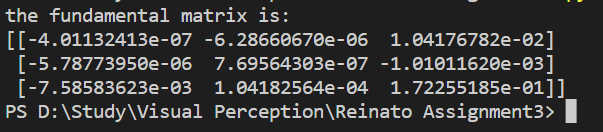

Before going towards next task, we have to calculate the Simpson distance as it will be apllied in next task. According to opencv the simpson distance is
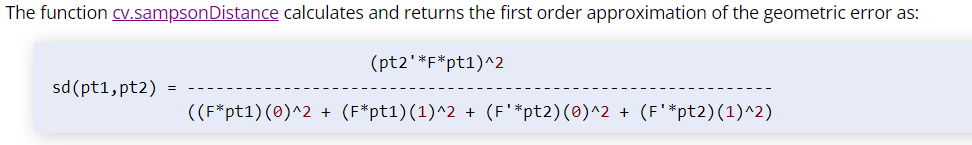

In [10]:
def sampson_distance(F, x1, x2):
    x1=np.append(x1,0)
    x2= np.append(x2,0)
    Fx1 = np.dot(F, x1.reshape(3, 1))
    Ftx2 = np.dot(F.T, x2.reshape(3, 1))
    numerator = np.square(np.dot(x2, np.dot(F, x1.T)))
    denominator = np.square(Fx1[0]) + np.square(Fx1[1]) + np.square(Ftx2[0]) + np.square(Ftx2[1]) 
    return numerator / denominator

The next task was to implement a RANSAC algorithm and combine it with Fundamental matrix estimation to find a fundamental matrix robust to outliers. In simple words we have to filter out the outliers and then calculate the fundamental matrix again.

What it does is that it calculates the fundamental matrix, then calculates the sampson distance and if that comes out to certain threshold then it should be included in the good points. After we filter out all the good inliers, we will get fundamental matrix again.

In [11]:
def estimate_fundamental_matrix_ransac(x1, x2, threshold=0.01, max_iterations=1000, sample_size=12):
    best_F = None
    best_inliers = None
    n = x1.shape[0]
    indices = np.arange(n)
    for i in range(max_iterations):
        sample = np.random.choice(indices, size=sample_size, replace=False)
        F = estimate_fundamental_matrix(x1[sample], x2[sample])
        inliers = []
        for j in range(n):
            if sampson_distance(F, x1[j], x2[j]) < threshold:
                inliers.append(j)
        if len(inliers) > len(good_inliers):
            good_F = estimate_fundamental_matrix(x1[inliers], x2[inliers])
            good_inliers = inliers
    return good_F, good_inliers

Unfortunately, we were unable to calculate the good_F because there was no inlier, the problem is that simpson distance is coming way huge then expected and so we were unable to calculate the fundamental matrix so we calculated the matrix using cv2.findFundamentalMat(x1, x2, cv2.FM_RANSAC), I will use this matrix for future function implementations
[[-3.07818188e-05 -3.45932672e-04  8.16605264e-01]
 [-6.96634448e-04 -9.28494602e-05  7.58100898e-02]
 [-5.74258277e-01 -5.06920107e-02  1.00000000e+00]] 

The next part of assignment includes showing of all the epipolar lines on the provided images. We take input as images, with points and fundamental matrix. First, we merge 2 images, then we draw points. After that, we calibrate the lines and then draw those lines.

In [12]:
def visualize_epipolar_lines(F, img1, img2, pts1, pts2):
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]
    img = np.zeros((max(h1, h2), w1 + w2, 3), dtype=np.uint8)

    # Concatenate the images
    img[:h1, :w1, :] = img1
    img[:h2, w1:, :] = img2
    lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
    lines1 = lines1.reshape(-1,3)
    lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
    lines2 = lines2.reshape(-1,3)

    # Draw epipolar lines
    for i, (pt1, pt2) in enumerate(zip(pts1, pts2)):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x1, y1 = pt1.ravel()
        x2, y2 = pt2.ravel()
        # Draw a point
        center = (int(x1), int(y1))
        cv2.circle(img, center, 5, color, -1)
        cv2.circle(img, (int(x2 + w1), int(y2)), 5, color, -1)
    # Draw the lines
    for line in lines1:
        x1, y1 = map(int, [0, -line[2]/line[1]])
        x2, y2 = map(int, [img1.shape[1], -(line[2]+line[0]*img1.shape[1])/line[1]])
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 1)

    for line in lines2:
        x1, y1 = map(int, [0, -line[2]/line[1]])
        x2, y2 = map(int, [img1.shape[1], -(line[2]+line[0]*img1.shape[1])/line[1]])
        cv2.line(img, (x1+img1.shape[1], y1), (x2+img1.shape[1], y2), (0, 0, 255), 1)
        
    # Display the image
    cv2.imshow('Epipolar Lines', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


The output of the visualization is based on fundamental matrix calculated by opencv because my ransac function is not working well.


In [ ]:
img1= cv2.imread("images/image_left.jpg")
img2= cv2.imread("images/image_right.jpg")
F, mask = cv2.findFundamentalMat(x1, x2, cv2.FM_RANSAC)
visualize_epipolar_lines(F, img1, img2, x1, x2)

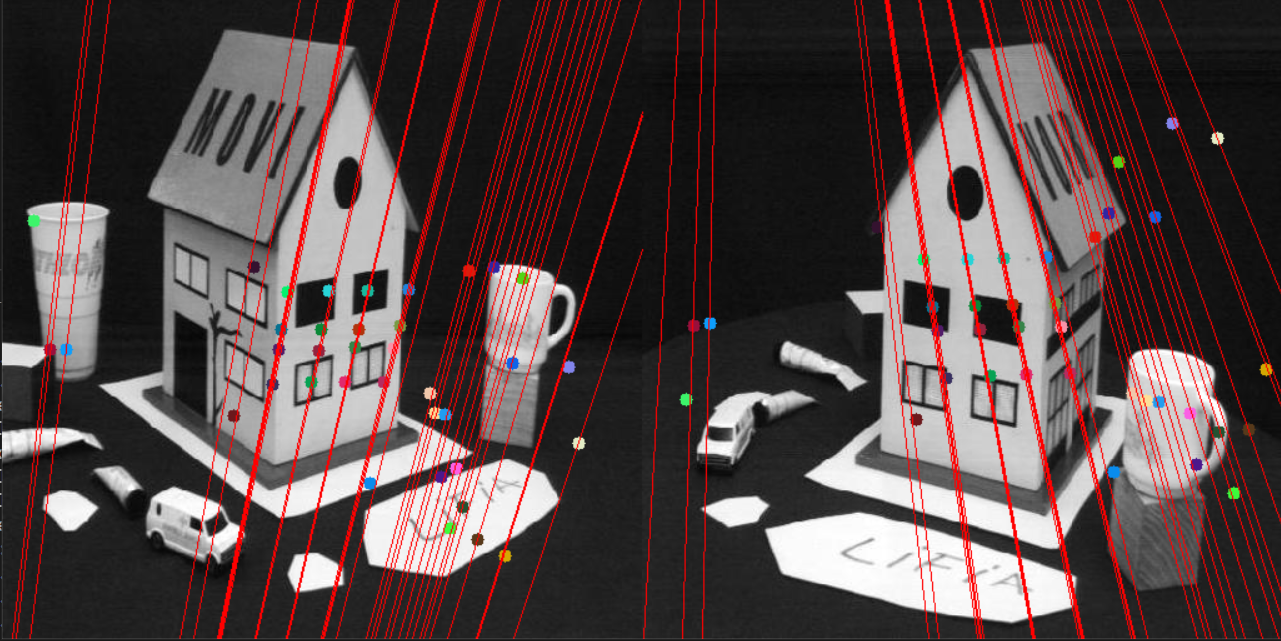

In the next step, we have to calculate the error which is actually the average distance between epipolar point and its line. 

In [13]:
def compute_epipolar_distance(F, pts1, pts2):
    # Compute the epipolar lines for the second set of points
    lines2 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2, F)
    lines2 = lines2.reshape(-1, 3)

    # Compute the distances between the points and their epipolar lines
    distances = np.abs(np.sum(pts1 * lines2[:, :2], axis=1) + lines2[:, 2]) / np.sqrt(np.sum(lines2[:, :2] ** 2, axis=1))

    # Compute the average distance
    avg_distance = np.mean(distances)

    return avg_distance

The avg_distance we got is around 1.832866892790145, It certainly not a good calibration. Now in the next step, we will add the Gaussian noise of value 0.5 and 1.5 and then test again. The function of addition of noise is  

In [14]:
def add_noise_to_points(pts, std_dev):
    #Add zero-mean Gaussian noise to pixel coordinates.
    
    noisy_pts = np.zeros_like(pts)
    for i in range(pts.shape[0]):
        noise = np.random.normal(loc=0, scale=std_dev, size=2)
        noisy_pts[i] = pts[i] + noise
    return noisy_pts

After applying the noise of 0.5, we got this visual result, Also the avg_distance got little incresea to 1.841597275219893
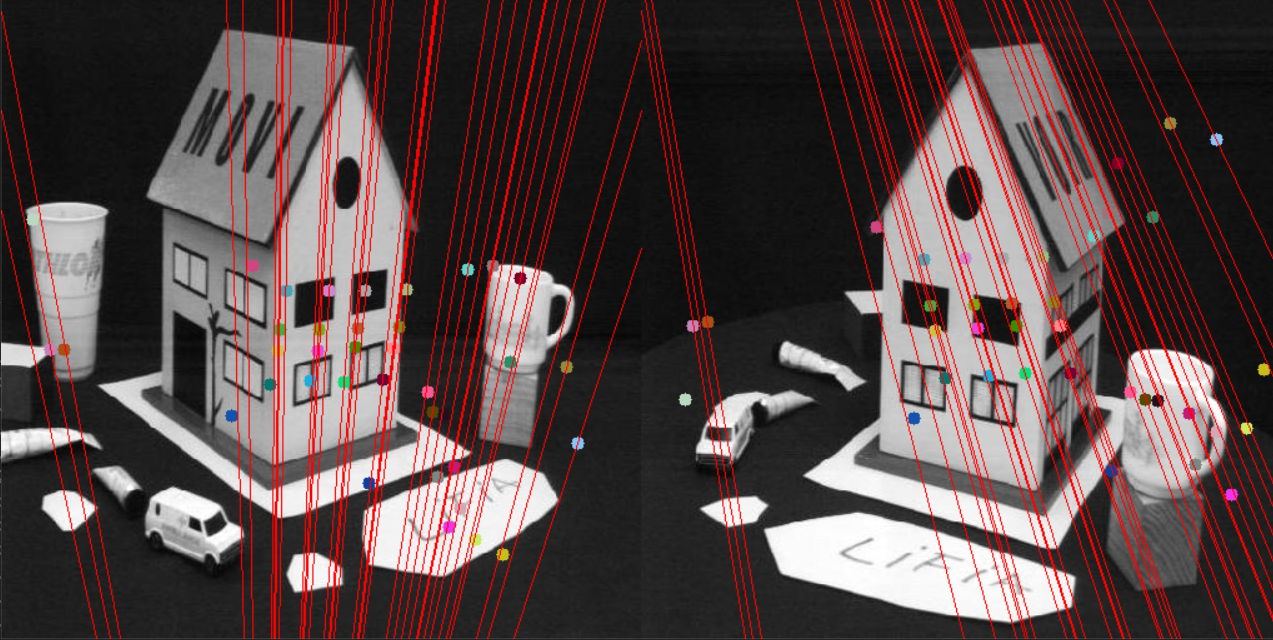

On increasing the value of noise to 1.5, the lines got more slopy towards the opposite end. The average distance gets increased to
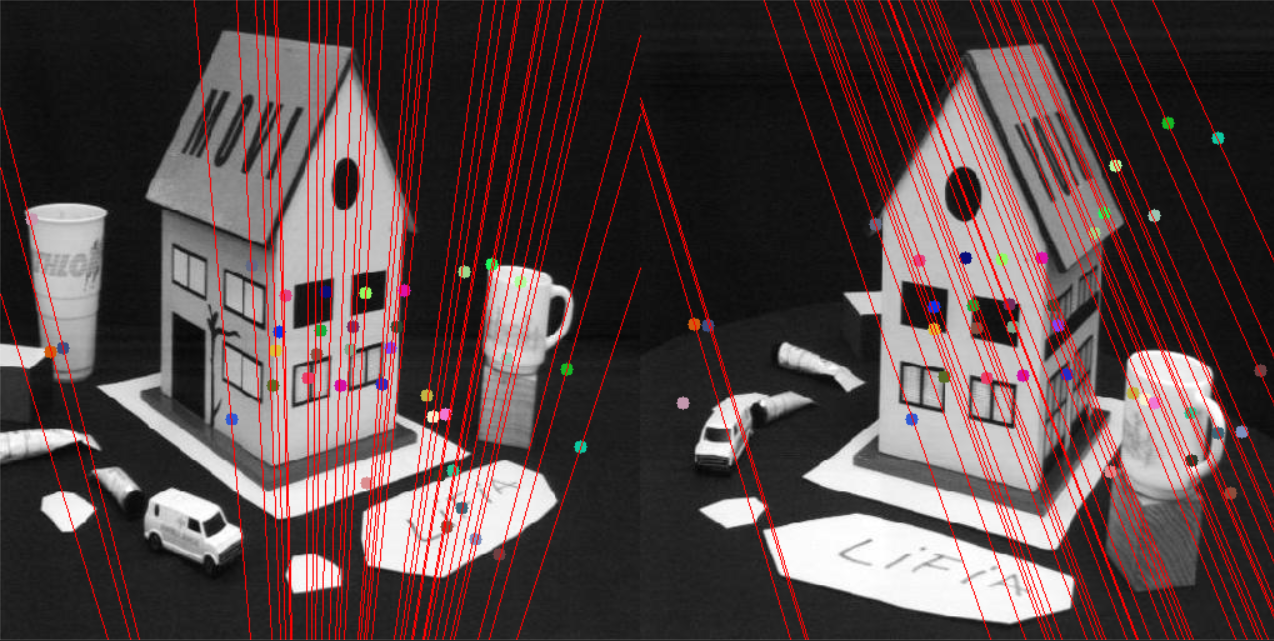

In the previous parts, we were using the points provided alongside the assignment. Now we will extract the points using SIFT and then take out the fundamental matrix out from it. In the first step, we will take image input and then apply SIFT on it based on certain contrast

In [4]:
def extract_sift_features(img, contrast_threshold=0.1):
    sift = cv2.xfeatures2d.SIFT_create(contrastThreshold=contrast_threshold)
    keypoints, descriptors = sift.detectAndCompute(img, None)
    return keypoints, descriptors

Then we will apply the brute force matching to match the SIFT took out from both images. we take both descriptors and use the standard cv2.BFMatcher() then we apply knnMatch to it and apply ratio test at the end.

In [5]:
def match_sift_descriptors(descriptor1, descriptor2):
    # Create a BFMatcher object with default params
    bf = cv2.BFMatcher()

    # Match descriptors
    matches = bf.knnMatch(descriptor1, descriptor2, k=2)

    # Apply ratio test
    matches = []
    for m, n in matches:
        if m.distance < 0.99 * n.distance:
            matches.append(m)

    return matches

In the last section, we have to remove the outliers using the cross validation test. Then we will plot the corresponding keypoints before and after the test implementation. 

In [15]:
def removeOutliers_sift(x1, keypoint1, matches):

    src_keypoints = keypoint1

    # Perform cross-validation to remove outliers
    src_pts_cv = np.float32([k1[m[0].queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts_cv = np.float32([k2[m[0].trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Use findHomography to get the mask for cross-validation
    _, mask = cv2.findHomography(src_pts_cv, dst_pts_cv, cv2.RANSAC, 5.0)

    if mask is not None:
        src_pts_cv = src_pts_cv[mask.ravel() == 1]
        dst_pts_cv = dst_pts_cv[mask.ravel() == 1]

    # Draw the keypoints before and after removing the outliers
    img_before = cv2.drawKeypoints(cv2.convertScaleAbs(x1), src_keypoints, None)
    img_after = cv2.drawKeypoints(cv2.convertScaleAbs(src_pts_cv.reshape(-1, 2)), [cv2.KeyPoint(x, y, 5) for x, y in src_pts_cv.reshape(-1, 2)], None)

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(img_before)
    plt.title('Keypoints before outlier removal')
    plt.subplot(122)
    plt.imshow(img_after)
    plt.title('Keypoints after outlier removal')
    plt.show()

    return src_pts_cv, dst_pts_cv

To implement this we have

In [ ]:
k1, descriptor1= extract_sift_features(img1)
k2, descriptor2= extract_sift_features(img2)
matches, good_matches= match_sift_descriptors(descriptor1, descriptor2)
src_pts_cv, dst_pts_cv= removeOutliers_sift(x1, k1, matches)
print(src_pts_cv)

This is the plot we got after implementing the last function
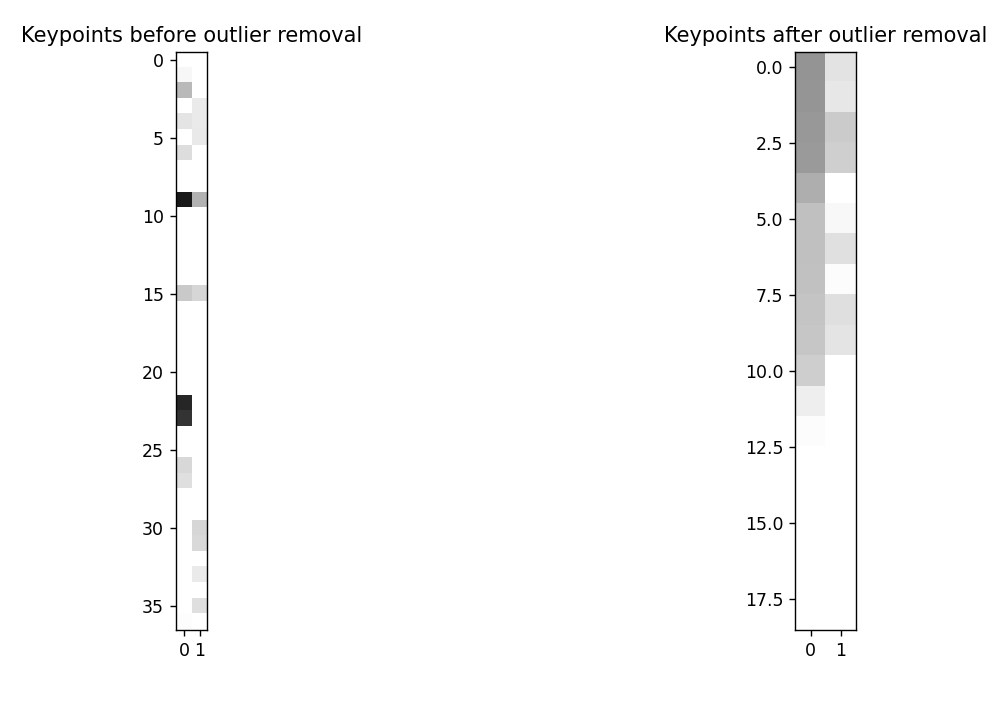

When using estimated correspondences instead of ground-truth correspondences, it's common to have some mismatched correspondences which can lead to incorrect estimation of the Fundamental matrix and thus epipolar lines. In this case, the epipolar lines may not be consistent with the scene geometry, leading to a noisy and cluttered visualization. This has just happened in our case, the output is not matching with the image given inside the assignment.

To improve the results, we can try to use more robust feature detection and matching techniques such as using more advanced feature detectors like ORB or AKAZE, or implementing robust matching algorithms like RANSAC or LMEDS. We can also try to optimize the parameters of the algorithms, such as the threshold for matching distance or the number of iterations in RANSAC, to improve the quality of the matches and reduce the number of outliers.

Another way to improve the results is to use additional information about the scene or camera geometry, such as camera calibration parameters or prior knowledge about the 3D structure of the scene, to constrain the possible solutions and reduce the uncertainty in the estimation of the Fundamental matrix.